In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio

In [2]:
pip install pandas plotly dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 74.3 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.7/226.7 kB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 45.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
pd.options.plotting.backend = "plotly"
pio.templates.default = "plotly_white"

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2023/main/posts/NYCTaxi.csv").assign(
    log_trip_duration = lambda df: np.log(df.trip_duration),
    pickup_datetime = lambda df: df.pickup_datetime.apply(pd.to_datetime),
    dropoff_datetime = lambda df: df.dropoff_datetime.apply(pd.to_datetime),
    dist = lambda df: np.sqrt((df.pickup_latitude-df.dropoff_latitude)**2 + (df.pickup_longitude-df.dropoff_longitude)**2),
    #---#
    vendor_id = lambda df: df.vendor_id.map({1:'A',2:'B'})
).assign(
    speed = lambda df: df.dist / df.trip_duration,
    pickup_hour = lambda df: df.pickup_datetime.dt.hour,
    dropoff_hour = lambda df: df.dropoff_datetime.dt.hour,
    dayofweek = lambda df: df.pickup_datetime.dt.dayofweek
)
df_small = df[::100].reset_index(drop=True)

In [10]:
day_of_week_mapping = {0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'}
tidydata = df.pivot_table(
    index = 'pickup_hour',
    columns = 'dayofweek',
    values = 'speed',
    aggfunc = 'mean'
).stack().reset_index().rename({0:'speed_mean'},axis=1)
tidydata['dayofweek'] = tidydata['dayofweek'].map(day_of_week_mapping)
fig1 = px.density_heatmap(
    data_frame=tidydata,
    x='pickup_hour',
    y='dayofweek',
    z='speed_mean',
    nbinsx=24,
    nbinsy=7,
    height=300
)
fig1 = fig1.update_layout(
    xaxis_title='pickup 시간',
    yaxis_title='요일',
     coloraxis_colorbar_title='평균속력'
)

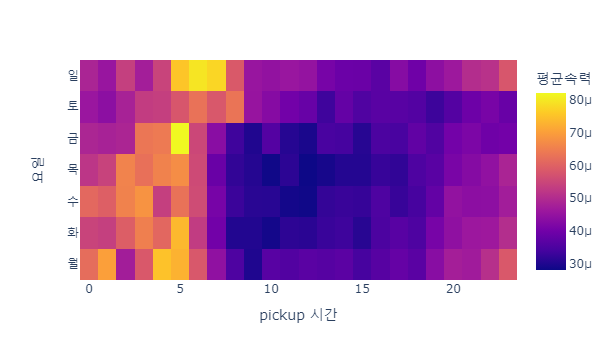

In [11]:
fig1